# Zadanie 1.


<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
/var/folders/qk/kz_wj6gd2_x88lqcpj7w9v8w0000gn/T/ipykernel_65053/4262047145.py:36: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(x, phi, label=f'$\phi_{{{m}}}(x)$')


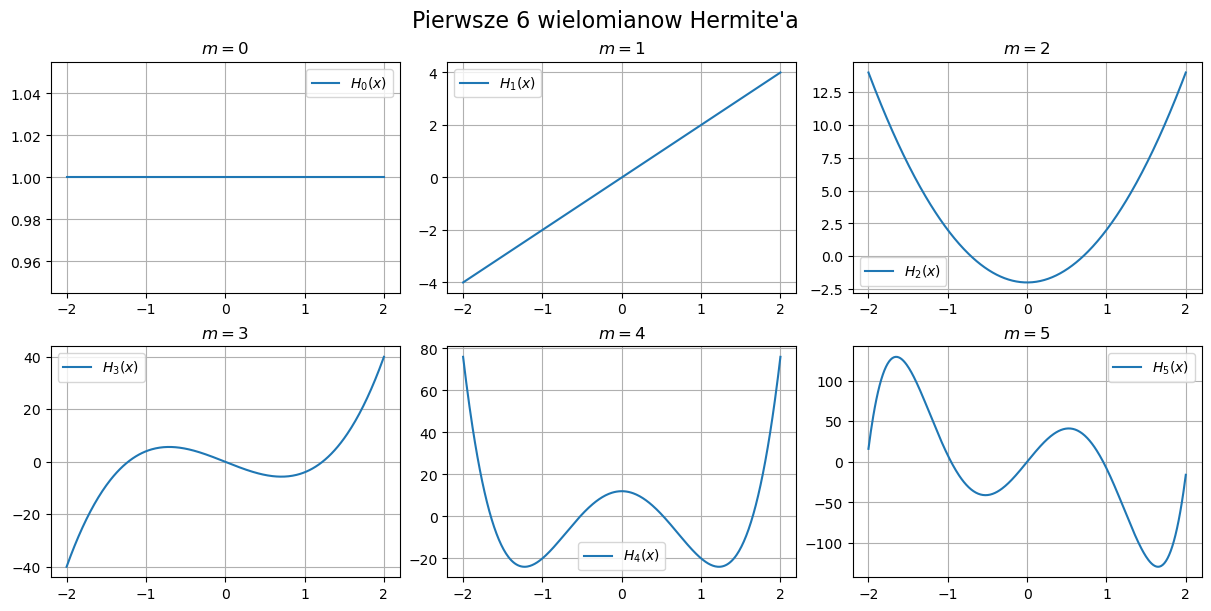

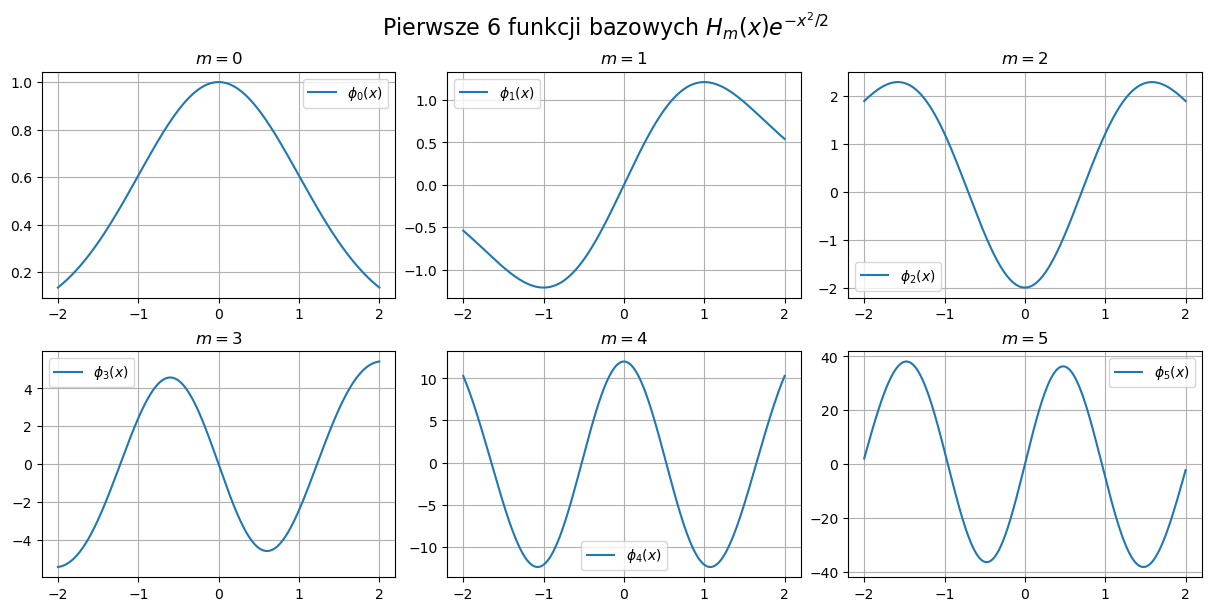

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

# Ustawienia wspolrzednych x
x = np.linspace(-2, 2, 400)

# Zadanie 1a: Rysowanie 6 pierwszych wielomianow Hermite'a H_m(x), m=0..5
fig, axes = plt.subplots(2, 3, figsize=(12, 6), constrained_layout=True)
fig.suptitle('Pierwsze 6 wielomianow Hermite\'a', fontsize=16)

for m, ax in enumerate(axes.flat):
    # Pobranie wielomianu Hermite'a stopnia m
    Hm = hermite(m)
    # Obliczenie wartosci wielomianu na siatce x
    y = Hm(x)
    ax.plot(x, y, label=f'$H_{{{m}}}(x)$')
    ax.set_title(f'$m={m}$')
    ax.grid(True)
    ax.legend()

plt.show()

# Zadanie 1b: Rysowanie 6 pierwszych funkcji bazowych z czynnikiem wagowym
# phi_m(x) = H_m(x) * exp(-x^2/2)
fig, axes = plt.subplots(2, 3, figsize=(12, 6), constrained_layout=True)
fig.suptitle('Pierwsze 6 funkcji bazowych $H_m(x)e^{-x^2/2}$', fontsize=16)

for m, ax in enumerate(axes.flat):
    # Wielomian Hermite'a stopnia m
    Hm = hermite(m)
    # Funkcja wagowa exp(-x^2/2)
    weight = np.exp(-x**2 / 2)
    # Obliczenie wartosci funkcji bazowej
    phi = Hm(x) * weight
    ax.plot(x, phi, label=f'$\phi_{{{m}}}(x)$')
    ax.set_title(f'$m={m}$')
    ax.grid(True)
    ax.legend()

plt.show()


# Zadanie 2.


In [23]:
import numpy as np
import pandas as pd
from scipy.special import hermite

# ----- Parametry -----
a, b    = -5, 5      # przedział całkowania
N       = 2000       # liczba punktów siatki
max_m   = 5          # najwyższy stopień wielomianu

# ----- Siatka punktów i krok -----
x  = np.linspace(a, b, N)
dx = x[1] - x[0]

# ----- Przygotowanie macierzy iloczynów skalarów ----- 
# inner_no_w[i,j] = ∫ H_i(x) H_j(x) dx
# inner_w[i,j]    = ∫ H_i(x) H_j(x) e^{-x^2} dx
inner_no_w = np.zeros((max_m+1, max_m+1))
inner_w    = np.zeros_like(inner_no_w)
w          = np.exp(-x**2)   # waga

for i in range(max_m+1):
    Hi = hermite(i)(x)
    for j in range(max_m+1):
        Hj = hermite(j)(x)
        inner_no_w[i, j] = np.dot(Hi * Hj, np.ones_like(x)) * dx
        inner_w[i, j]    = np.dot(Hi * Hj * w, np.ones_like(x)) * dx

# ----- Stworzenie DataFrame dla czytelnego wydruku ----- 
labels = [f'H{i}' for i in range(max_m+1)]
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_no_w = pd.DataFrame(inner_no_w, index=labels, columns=labels).round(4)
df_w    = pd.DataFrame(inner_w,    index=labels, columns=labels).round(4)

print("=== Iloczyny skalarne ⟨H_i, H_j⟩ BEZ wagi (ω(x)=1) ===")
print(df_no_w, "\n")
print("=== Iloczyny skalarne ⟨H_i, H_j⟩ Z wagą ω(x)=exp(-x^2) ===")
print(df_w)

=== Iloczyny skalarne ⟨H_i, H_j⟩ BEZ wagi (ω(x)=1) ===
            H0            H1            H2            H3            H4            H5
H0     10.0050 -0.000000e+00  3.138237e+02 -0.000000e+00  1.616411e+04 -0.000000e+00
H1     -0.0000  3.338338e+02 -0.000000e+00  1.804706e+04 -0.000000e+00  1.052608e+06
H2    313.8237 -0.000000e+00  1.875474e+04 -0.000000e+00  1.164656e+06 -0.000000e+00
H3     -0.0000  1.804706e+04 -0.000000e+00  1.204996e+06 -0.000000e+00  7.782781e+07
H4  16164.1134 -0.000000e+00  1.164656e+06 -0.000000e+00  8.047984e+07 -0.000000e+00
H5     -0.0000  1.052608e+06 -0.000000e+00  7.782781e+07 -0.000000e+00  5.375079e+09 

=== Iloczyny skalarne ⟨H_i, H_j⟩ Z wagą ω(x)=exp(-x^2) ===
        H0      H1       H2       H3       H4         H5
H0  1.7725 -0.0000  -0.0000   0.0000   -0.000     0.0000
H1 -0.0000  3.5449  -0.0000  -0.0000   -0.000    -0.0000
H2 -0.0000 -0.0000  14.1796  -0.0000   -0.000     0.0000
H3  0.0000 -0.0000  -0.0000  85.0778    0.000    -0.0002
H4 -

## Wniosek z Zadania 2

1. **Bez funkcji wagowej**  
   $$\langle H_i, H_j\rangle = \int_a^b H_i(x)\,H_j(x)\,dx$$  
   Macierz iloczynów skalarów (ω(x)=1) ma znaczące wartości poza przekątną →  
   **wielomiany Hermite’a nie są ortogonalne** względem zwykłego iloczynu skalarnego.

2. **Z funkcją wagową** $$\omega(x)=\exp(-x^2)$$  
   $$\langle H_i, H_j\rangle = \int_a^b H_i(x)\,H_j(x)\,\exp(-x^2)\,dx$$  
   Po obliczeniach na siatce wszystkie elementy poza przekątną są (praktycznie) zerowe →  
   **Hermite’y są ortogonalne** względem tej wagi.

3. **Normy na przekątnej** macierzy z wagą  
   $$G^w_{ii} = \langle H_i, H_i\rangle$$  
   rosną wraz ze stopniem $i$, co odpowiada $\|H_i\|^2$.  
   Dzieląc każdy $H_i$ przez $\sqrt{G^w_{ii}}$ otrzymujemy **wielomiany ortonormalne**.

---
> Wielomiany Hermite’a tworzą rodzinę ortogonalną względem wagi $\exp(-x^2)$, ale **nie** względem standardowego iloczynu skalarnego bez wagi.

# Zadanie 3.


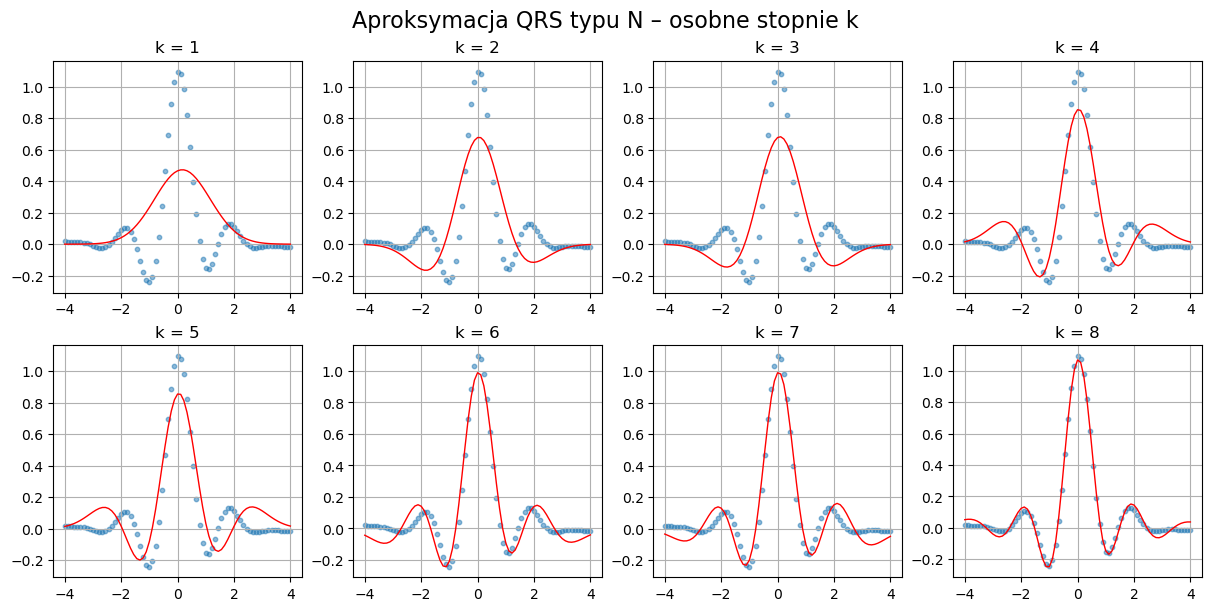

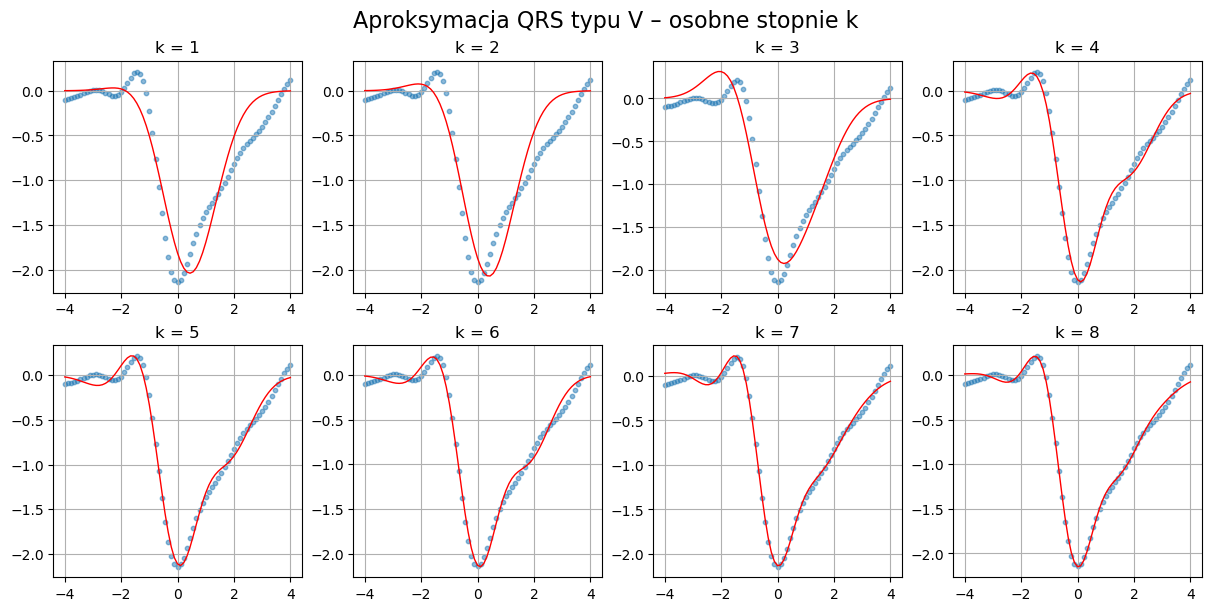

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import hermite

# ----- Funkcja bazowa -----
def base_fun(x, k, normalize=True):
    Hk = hermite(k)
    phi = Hk(x) * np.exp(-x**2 / 2)
    if normalize:
        phi /= np.linalg.norm(phi)
    return phi

# ----- Wczytanie danych -----
ekg = pd.read_csv('ecg_data.csv', sep=';')
xx = ekg['time'].values * 40
y_N = ekg['signalN'].values
y_V = ekg['signalV'].values

# ----- Aproksymacja -----
def approximate_signal(xx, yy, max_k):
    bases = np.array([base_fun(xx, k) for k in range(max_k+1)])
    coeffs = np.array([np.dot(yy, bases[k]) for k in range(max_k+1)])
    y_app = np.array([coeffs[k] * bases[k] for k in range(max_k+1)])
    return np.cumsum(y_app, axis=0)

max_degree = 8
y_app_N = approximate_signal(xx, y_N, max_degree)
y_app_V = approximate_signal(xx, y_V, max_degree)

# ----- Rysowanie siatki 2×4 dla sygnału N -----
fig, axes = plt.subplots(2, 4, figsize=(12, 6), constrained_layout=True)
fig.suptitle('Aproksymacja QRS typu N – osobne stopnie k', fontsize=16)

for idx, k in enumerate(range(1, max_degree+1)):
    ax = axes.flat[idx]
    ax.scatter(xx, y_N, s=10, alpha=0.5)
    ax.plot(xx, y_app_N[k], 'r', lw=1)
    ax.set_title(f'k = {k}')
    ax.grid(True)


plt.show()

# ----- Analogicznie: siatka 2×4 dla sygnału V -----
fig, axes = plt.subplots(2, 4, figsize=(12, 6), constrained_layout=True)
fig.suptitle('Aproksymacja QRS typu V – osobne stopnie k', fontsize=16)

for idx, k in enumerate(range(1, max_degree+1)):
    ax = axes.flat[idx]
    ax.scatter(xx, y_V, s=10, alpha=0.5)
    ax.plot(xx, y_app_V[k], 'r', lw=1)
    ax.set_title(f'k = {k}')
    ax.grid(True)


plt.show()


# Zadanie 4.


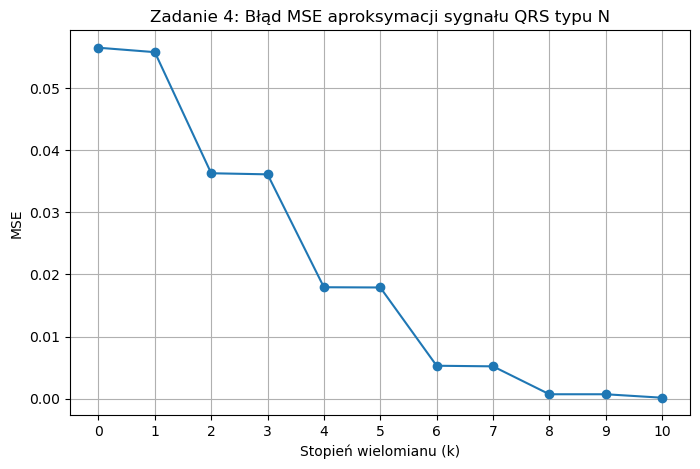

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import hermite

# ----- Funkcja bazowa -----
def base_fun(x, k, normalize=True):
    """
    Oblicza k-tą funkcję bazową:
        φₖ(x) = Hₖ(x) * exp(-x²/2)
    Jeśli normalize=True, dzieli wektor przez jego normę.
    """
    Hk = hermite(k)                 # obiekt polinomu Hermite’a stopnia k
    phi = Hk(x) * np.exp(-x**2 / 2)  # mnożenie przez funkcję wagową
    if normalize:
        phi /= np.linalg.norm(phi)  # normalizacja do długości 1
    return phi

# ----- Wczytanie danych EKG -----
ekg = pd.read_csv('ecg_data.csv', sep=';')
# Skalujemy oś czasu, żeby baza lepiej pasowała do szerokości QRS
xx = ekg['time'].values * 40
y_N = ekg['signalN'].values

# ----- Funkcja licząca błąd MSE „ręcznie” -----
def compute_errors_manual(yy, xx, max_deg):
    """
    Oblicza MSE aproksymacji sygnału yy dla stopni 0..max_deg.
    Zwraca listę błędów MSE dla każdego stopnia.
    MSE liczymy jako mean((yy - y_approx)^2).
    """
    errors = []
    # Przygotuj wszystkie funkcje bazowe φ₀..φ_max_deg
    bases = [base_fun(xx, k) for k in range(max_deg+1)]
    # Wektor skumulowanej aproksymacji
    y_cum = np.zeros_like(yy)
    
    for k in range(max_deg+1):
        # oblicz współczynnik aproksymacji: rzut yy na φ_k
        coeff = np.dot(yy, bases[k])
        # dodaj wkład k-tej bazy
        y_cum += coeff * bases[k]
        # policz błąd MSE
        mse_k = np.mean((yy - y_cum)**2)
        errors.append(mse_k)
    
    return errors

# ----- Obliczenie błędów dla stopni 0..10 -----
max_degree = 10
errors_N = compute_errors_manual(y_N, xx, max_degree)

# ----- Rysowanie wykresu błędu -----  
plt.figure(figsize=(8, 5))
plt.plot(range(max_degree+1), errors_N, marker='o')
plt.title('Zadanie 4: Błąd MSE aproksymacji sygnału QRS typu N')
plt.xlabel('Stopień wielomianu (k)')
plt.ylabel('MSE')
plt.xticks(range(max_degree+1))
plt.grid(True)
plt.show()


	
## Wniosek:
Na podstawie wykresu można wybrać stopień k w miejscu, gdzie spadek błędu się spowalnia
(tzw. "kolano").  
	• Jeśli chcemy kompaktowego modelu z dobrym przybliżeniem (unikać nadmiernej złożoności), to wystarczy k=6 — błąd spada już z 0.018 do 0.005, a potem przyrost poprawy jest niewielki.  
	• Jeśli zależy nam na maksymalnej redukcji MSE i nie boimy się użyć wyższego stopnia, to „prawdziwe” kolano jest około k=8 — stamtąd błąd już praktycznie zbliża się do zera.  